# Module 2 - Data collection, validation and privacy


### Assignment overview

In this assignment, you will be exploring various aspects related to collecting data and identifying bias in datasets. You will also be asked to consider issues of data privacy and governance.

For this assignment, it is possible to work in **groups of up to 2 students**. 

### Group members
Leave blanks if group has less than 2 members:
- Student 1: Xueyong Zhang
- Student 2: YuWen Luo

### Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
1. Discuss the implications of data governance and data ownership in data science  
2. Argue the advantages and disadvantages of collecting individuals’ data online  
3. Distinguish between a sample and a population, what attributes make a representative sample and the possible ethical implications of a non-representative sample  
4. Explain the elements of experimental design 
5. Identify possible sources of bias in datasets (such as historical, measurement, and representation bias) 
6. Describe the ethical implications of variable choice in data science (e.g., use of proxies, use of gender and race as variables) 
7. Apply good practices for minimizing errors in data cleaning  
8. Apply methods for improving privacy and anonymity in stored data and data analysis, such as k-anonymity and randomized response 
9. Explain the notion of differential privacy 


# Part 1: Data collection, sampling and bias

In class, we discussed different sources of bias that can affect the data we want to use for our Data Science applications. Here is a summary:

### 1. Historical bias
**Historical bias:** bias that exists in society and is reflected in the data. It is the most insidious because it arises even if we are able to perfectly sample from the existing population. Most often, it affects groups that are historically disadvantaged.

E.g. In 2018, 5% of Fortune 500 CEOs were women. Historically, women have less frequently made it to a CEO position. A classifier trained to predict the best choice for a new CEO may learn this pattern and determine that being a woman makes one less qualified to be a CEO.

### 2. Representation bias
**Representation bias:** the sample underrepresents part(s) of the population and fails to generalize well. This may happen for different reasons:

1. The sampling methods only reached a portion of the population. E.g. Data collected via smartphone apps can under-represent lower incomes or older groups, who may be less likely to own smartphones.

2. The population of interest has changed or is distinct from the sample used during model training. E.g. Data that is representative of Vancouver may not be representative if used to analyze the population in Toronto. Similarly, data representative of Vancouver 100 years ago may not reflect today's population. 

### 3. Measurement bias
**Measurement bias:** it occurs when choosing features that fail to correctly represent the problem, or when there are issues with the data collection. Fore example:

1. The measurement processes varies across groups. E.g. one group of workers is monitored more closely and thus more errors are observed in that group.

2. The quality of data varies across groups. E.g. women often self-report less pain than men and are therefore less likely to receive certain diagnoses

3. The defined classification task or one of the features used is an oversimplification. E.g. We are designing a model to predict whether a student will be successful in college. We choose to predict the final GPA as metric of success. This, however, ignores other indicators of success.

**Question 1** 

Consider a crowd-sourcing project called [Street Bump](https://www.boston.gov/transportation/street-bump) aimed at helping improve neighbourhood streets in Boston from 2011 to 2014. Volunteers used a smartphone app, which captured GPS location and reported back to the city everytime the driver hit a pothole. The data was provided to governments so they could use the data to fix any road issues.

Can you think of any sources of bias in the scenario above? Explain them. 

Representation Bias:

- The data collection method relies on smartphone users who volunteer to report potholes. This could under-represent lower-income groups, the elderly, or those without access to smartphones, meaning potholes in wealthier neighborhoods are more likely to be reported and fixed, while issues in lower-income areas may go unnoticed.
- Additionally, certain areas may have more active volunteers, resulting in unequal reporting across neighborhoods. The project might miss out on data from areas where residents are less likely to participate, skewing the dataset.

Historical Bias:

- If historically, certain neighborhoods have received more attention and investment in road maintenance, the project may reinforce this by directing resources to areas where more reports are generated. This could perpetuate inequality, as historically disadvantaged areas may continue to receive less attention.

Measurement Bias:

- The way the app detects potholes may not accurately capture all road issues. For example, if the app send back the report automatically, it might miss smaller bumps or issues that don’t trigger a response from the app but are still problematic for certain vehicles like bicycles or pedestrians.
- The data collected may also vary in quality based on factors like the type of vehicle, the speed at which it's driven, the type of the phone or where the phone is placed in the vehicle. This potentially introduce inconsistencies in the dataset.

## Observational and experimental studies

- **Observational study:** study where there is no deliberate human intervention regarding the variable under investigation. Observational studies are ones where researchers observe the effect of a treatment/intervention without trying to change who is or isn’t exposed to it. In an observational study, the subjects are assigned or assign themselves to the exposure group they belong to.
- **Experimental study:** : study that involves planned intervention on the exposure to a condition. In an experiment, subjects are assigned to a condition by the researcher and thus one can establish a cause-and-effect relationship when we see a difference in the outcome between the experimental groups. Randomizing study subjects balances any differences between treatment groups with respect to all variables except the condition of exposure.

## A/B testing

A/B testing can be considered the most basic kind of randomized controlled experiment. 

Complete the following reading, then answer the comprehension questions below: https://hbr.org/2017/06/a-refresher-on-ab-testing

**Question 2**

In the following table, select which statements are true or false:

| Statement | True | False |
| -------- | :------- | :------- |
| A/B testing is an example of experimental study. |    *    |        | 
| Observational studies require subjects to not be informed that they are being studied. |        |    *    |  
| Ethical experimental studies require genuine uncertainty about the benefits/harms of treatment or exposure (equipoise) |    *    |        | 
| A researcher is interested in studying the effects of certain dietary habits. They recruite people and, through a survey, they ask them to disclose their current dietary habits, on which bases they will be assigned to treatment or control group. This is an example of experimantal study. |        |    *    | 
| The control group and the exposed group must include different individuals. |        |    *    | 
| One of the main advantages of experimental studies is that they allow for better randomization. |    *    |        | 



**Question 3**

Explain the role of blocking in A/B testing.

1. Control for Confounding Variables: Blocking helps to account for external variables (e.g., location, device type, or user demographics) that could impact the results. This ensures effects of confounding variables are minimized, and makes it easier to observe the effects of the experimental variables (eg A/B variables) without the noise introduced by the confounding variables.

2. Improve Precision: By grouping similar experimental units together into blocks, A/B tests can reduce within-block variability. This makes it easier to detect true differences between the A and B groups, improving the precision and reliability of the test results.

3. Prevent Bias: Blocking ensures that important subgroups are fairly represented in both the treatment and control groups, preventing bias that could occur if certain subgroups were disproportionately allocated to one group.

4. Enhance Efficiency: When experimental units are blocked into similar groups, it often leads to more efficient use of data, which can result in needing fewer experimental units to achieve the same level of statistical power, or it can lead to more robust conclusions drawn from the same number of units.

**Question 4**

The authors warn about observing too many metrics when running an A/B test. Why is that the case? What could happen if I ignore this warning?

Why too many metrics matters:

- Because observing too many metrics in an A/B test can increase the risk of false positives (Type I error) and leads to the multiple comparisons problem, where the probability that some metrics may appear significant purely by chance increases. This can result in incorrect conclusions, wasted resources, and potentially harmful business decisions.
- Additionally, it may shift focus and may encourage p-hacking, where analysts continuously search through the data for any significant result, even if it's due to chance and lacks real meaning.
- With too many metrics, it's more likely to make spurious correlations, where relationships that appear statistically significant but are actually due to random variation or the specific sample used in the test. These can mislead decision-making and strategy if taken as evidence of real, underlying patterns.
- Having too many metrics usually create very complex model which could lead to overfitting, which can result in decisions that perform well in the test but poorly in real world applications.
- Also focusing too many metrics makes it harder to determine which factors are truly impactful, dilute the overall focus of the test results.

If I ignore this warning: this can lead to poor strategic decisions and will waste recourses on developing features that do not actually beneficial but are suggested by the misleading results.

To avoid observing too many metrics, we can predefine key metrics, use corrections like the Bonferroni method, and focus on outcomes that are relevant to the business. This helps ensure more reliable and actionable test results.

**Question 5** 

You want to determine the size of the subscribe button on your website. You plan to evaluate the performance by the number of visitors who click on the button. To run the test, you show one set of users one version and collect information about the number of visitors who click on the button. One month later you show users another version where the only thing different is the size of the button. Based on this test, you determine that the second version had a higher number of visitors who clicked on the button. Can you conclude that this version of the website leads to a higher number of visitors clicking on the button? Briefly explain.  

No, we cannot conclusively determine that the second version leads to a higher number of visitors clicking on the button based on this test.

1. It is because the two versions were shown at different times, other factors, such as seasonality, external events, changes in visitor demographics could have influenced user behavior. Without randomly assigning users to see both versions simultaneously, it's impossible to isolate the impact of the button size alone, which makes the test results unreliable. A proper A/B test should compare both versions in parallel to account for such variables.
2. This is not a proper experimental study since the two versions were shown at different times without randomization, other factors could have influenced the results, making the conclusion unreliable. In an experimental study, participants should be randomly assigned to different conditions (e.g., different button sizes) simultaneously. This randomization balances other variables that might affect the outcome, allowing for a valid comparison and establishing a cause-and-effect relationship.
3. There's no blocking to control the confounding variabls, for example, the mobile users and the desktop users. Such potential confounding variables could influence the results independently of the button size.

### Ethical A/B testing
Ethical A/B testing still requires all the ethical considerations of any experimental study, such as informed consent or possibility to opt out. A notorious case of a company failing to meet ethics requirement in A/B testing is the infamous Facebook "social contagion experiment", in which almost 700,000 users were showed, for a week, only positive or only negative content, to see how this variation impacted their online behaviour. The selected users were not informed and could not opt out. Furthermore, their emotional state was affected. Facebook defended itself by saying that Facebook's Data Use Policy warns users that Facebook “may use the information we receive about you…for internal operations, including troubleshooting, data analysis, testing, research and service improvement”. This defense was largely rejected by the scientific community, which still considered the study as unethical. You can read more about this incident in this [article](https://www.theguardian.com/technology/2014/jun/30/facebook-emotion-study-breached-ethical-guidelines-researchers-say). 

## Case Study: National Institute of Justice's (NIJ) Recidivism Dataset 

We will now look at the NIJ's Recidivism data set, which contains data on 26,000 individuals from the State of Georgia released from prison on parole (early release from prison where the person agrees to abide by certain conditions) between January 1, 2013 and December 31, 2015. **Recidivism** is the act of committing another crime.

This dataset is split into two sets, training and test, 70% of the data is in the training dataset and 30% in the test dataset. The training set contains four variables that measure recidivism: whether an individual recidivated within three years of the supervision start date and whether they recidivated in year 1, year 2, or year 3. In this data set, recidivism is defined as being arrested for a new crime during this three-year period. The test set does not include these four variables. 

The data was provided by the Georgia Department of Community Supervision (GDCS) and the Georgia Bureau of Investigation.

*Source: https://data.ojp.usdoj.gov/stories/s/daxx-hznc*

Let's start by familiarizing with the [dataset source](https://nij.ojp.gov/funding/recidivism-forecasting-challenge). The website includes a lot of information on the dataset and a detailed description of each of its columns (look for Appendix 2: Codebook).



**Question 6**
Think about how the data set was collected and what we are trying to predict. Are there any potential sources of bias (historical, representation, measurement)? Explain your answer. 

The dataset has potential sources of bias:

1. Historical Bias: Since the dataset includes demographics, prison and parole case information, prior community supervision history, certain demographic groups might be disproportionately policed, leading to higher arrest rates for the particular groups. If the dataset reflects these historical inequities, the predicted model could perpetuate or even exacerbate these biases by mistakenly identifying these groups as having a higher likelihood of recidivism purely based on past data.

2. Representation Bias: Since the dataset only includes individuals released on parole from Georgia prisons, while no other individuals released from prison or those from other states or jurisdictions. Differences in state laws, parole conditions, and conditions of supervision can significantly affect recidivism rates, which means the model's predictions could be less accurate when applied outside of Georgia or to populations not on parole.

3. Measurement Bias: Recidivism is measured by arrests for new crimes within three years of the supervision start date, but not all arrests are justified or lead to convictions. Also recidivism is only tracked for three years, long-term trends may be overlooked. Moreover, the data is collected from parole officers' reports, which may not capture all the relevant factors that could affect recidivism rates.

### Question 7: Exploratory Data Analysis (EDA)

We are now going to perform some Exploratory Data Analysis on the NIJ's Recidivism Training set. This will serve 2 purposes:
- it will help us familiarize with the dataset
- it will help us spot possible imbalances or sources of bias in the dataset

You are free to use tools and functions of your choice to complete the EDA. Your goal is to answer the following questions:
1. Does the dataset include protected characteristics? We recommend using the [BC Human Rights Code](http://www.bchrt.bc.ca/human-rights-duties/characteristics.htm) for reference.
2. If the dataset includes protected characteristic, do you think they are necessary to perform the predictive task? Why or why not?
3. If we were to remove the columns including protected characteristics, do you think it would still be possible to retrieve that information through other features (proxies)? Explain how.
4. Is the target variable balanced? If not, what could happen?
5. Is the target variable balanced *across protected segments of the population?* What could happen if this is not the case? 
6. Are there features with missing values? Do you suspect that they may be Missing Not At Random (MNAR), and if so, how would it be best to fill this information?

**Notes:**
- Bar charts and other plots are helpful to visually spot imbalances
- You are encouraged to talk to the instructor and TA to discuss your EDA strategy and if you need suggestions with the code

#### 1. Does the dataset include protected characteristics?
Using the BC Human Rights Code as a reference, the dataset includes several protected characteristics:
- `Gender`: This is a protected characteristic under most human rights laws.
- `Race`: Also a protected characteristic under most human rights laws.
- `Age_at_Release`: Age can be considered a protected characteristic, especially in terms of potential discrimination.
- Many columns that related to Criminal conviction such as `prior_arrests`, `prison_offense` and `prison_year`

In [2]:
import pandas as pd

df = pd.read_csv('NIJ_s_Recidivism_Challenge_Training_Dataset.csv')
print(df.head()) 

   ID Gender   Race Age_at_Release  Residence_PUMA Gang_Affiliated  \
0   1      M  BLACK          43-47              16           False   
1   2      M  BLACK          33-37              16           False   
2   3      M  BLACK    48 or older              24           False   
3   4      M  WHITE          38-42              16           False   
4   5      M  WHITE          33-37              16           False   

   Supervision_Risk_Score_First Supervision_Level_First  \
0                           3.0                Standard   
1                           6.0             Specialized   
2                           7.0                    High   
3                           7.0                    High   
4                           4.0             Specialized   

         Education_Level Dependents  ... DrugTests_Cocaine_Positive  \
0  At least some college  3 or more  ...                        0.0   
1   Less than HS diploma          1  ...                        0.0   
2  At least

In [3]:
df.describe()

,ID,Residence_PUMA,Supervision_Risk_Score_First,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year
count,18028.000000,18028.000000,17698.000000,13768.000000,14396.000000,14396.000000,14396.000000,14396.000000,17721.000000,17494.000000
mean,13386.065343,12.307577,6.064753,93.585860,0.063120,0.014173,0.012768,0.007681,0.480035,0.766423
std,7721.451992,7.143255,2.382811,117.561341,0.138357,0.063473,0.059572,0.042224,0.424396,0.813474
min,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6702.750000,6.000000,4.000000,28.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13405.500000,12.000000,6.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.466543,0.636324
75%,20081.250000,18.000000,8.000000,110.000000,0.068242,0.000000,0.000000,0.000000,0.966184,1.000000
max,26761.000000,25.000000,10.000000,1087.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


#### 2. Are these protected characteristics necessary for the predictive task?
In a recidivism prediction model, the inclusion of protected characteristics like gender or race might lead to biased predictions and raise fairness concerns. Thus, these characteristics might not be necessary for the task and could introduce unwanted bias.

However, age at release could be considered relevant to recidivism, as it might have a legitimate correlation with re-offending rates. And the code below using heat map to show the correlation between age at release recidivism. However, according to the heat map, there is no strong correlation between `Age At Release` and either `Recidivism Within 3 years`, `Recidivism_Arrest_Year1`, `Recidivism_Arrest_Year2`or `Recidivism_Arrest_Year3`.

In terms of other columns related to Criminal conviction, they are necessary for the predictive task of predicting recidivism because prior convictions are strong predictors of future offenses, backed by criminological research. Removing this data would weaken the model's ability to assess reoffending risk, as criminal history is a key objective factor in predicting future behavior.

As a result, we think three of the protected characteristics `Gender`, `Race`, `Age At Release` are not necessary for the predictive task.

In [5]:
age_categories = df['Age_at_Release'].unique()
age_categories

array(['43-47', '33-37', '48 or older', '38-42', '18-22', '23-27',
       '28-32'], dtype=object)

 There are 7 categories in `Age_at_Release`. Map the them to an integer value (using the mid-point of each range) and save the result into a new column named `Age_at_Release_Int`

In [6]:
age_mapping = {
    '18-22': 20,
    '23-27': 25,
    '28-32': 30,
    '33-37': 35,
    '38-42': 40,
    '43-47': 45,
    '48 or older': 50
}
df['Age_at_Release_Int'] = df['Age_at_Release'].map(age_mapping)
df[['Age_at_Release', 'Age_at_Release_Int']].head()

,Age_at_Release,Age_at_Release_Int
0,43-47,45
1,33-37,35
2,48 or older,50
3,38-42,40
4,33-37,35


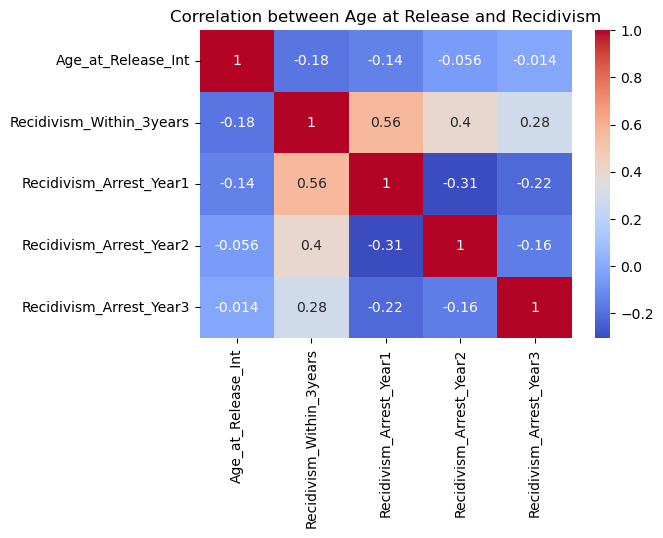

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Recidivism_Within_3years'] = df['Recidivism_Within_3years'].astype(int)
df['Recidivism_Arrest_Year1'] = df['Recidivism_Arrest_Year1'].astype(int)
df['Recidivism_Arrest_Year2'] = df['Recidivism_Arrest_Year2'].astype(int)
df['Recidivism_Arrest_Year3'] = df['Recidivism_Arrest_Year3'].astype(int)

correlation_matrix = df[['Age_at_Release_Int', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3', ]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation between Age at Release and Recidivism')
plt.show()


#### 3. Could the information still be retrieved through proxies if we remove protected characteristics?
Yes, it's possible that protected characteristics could be inferred through proxies:
- `Residence_PUMA`: this could serve as a proxy for `race`, as neighborhoods may have demographic correlations.
- `Supervision_Risk_Score_First` and `Supervision_Level_First`: These might indirectly reflect bias tied to `gender` or `race` based on historical disparities in supervision and policing.
- `Education_Level` and `Employment_Exempt`: These could also serve as proxies for `race`, potentially recreating bias even if race is removed.

#### 4. Is the target variable balanced?


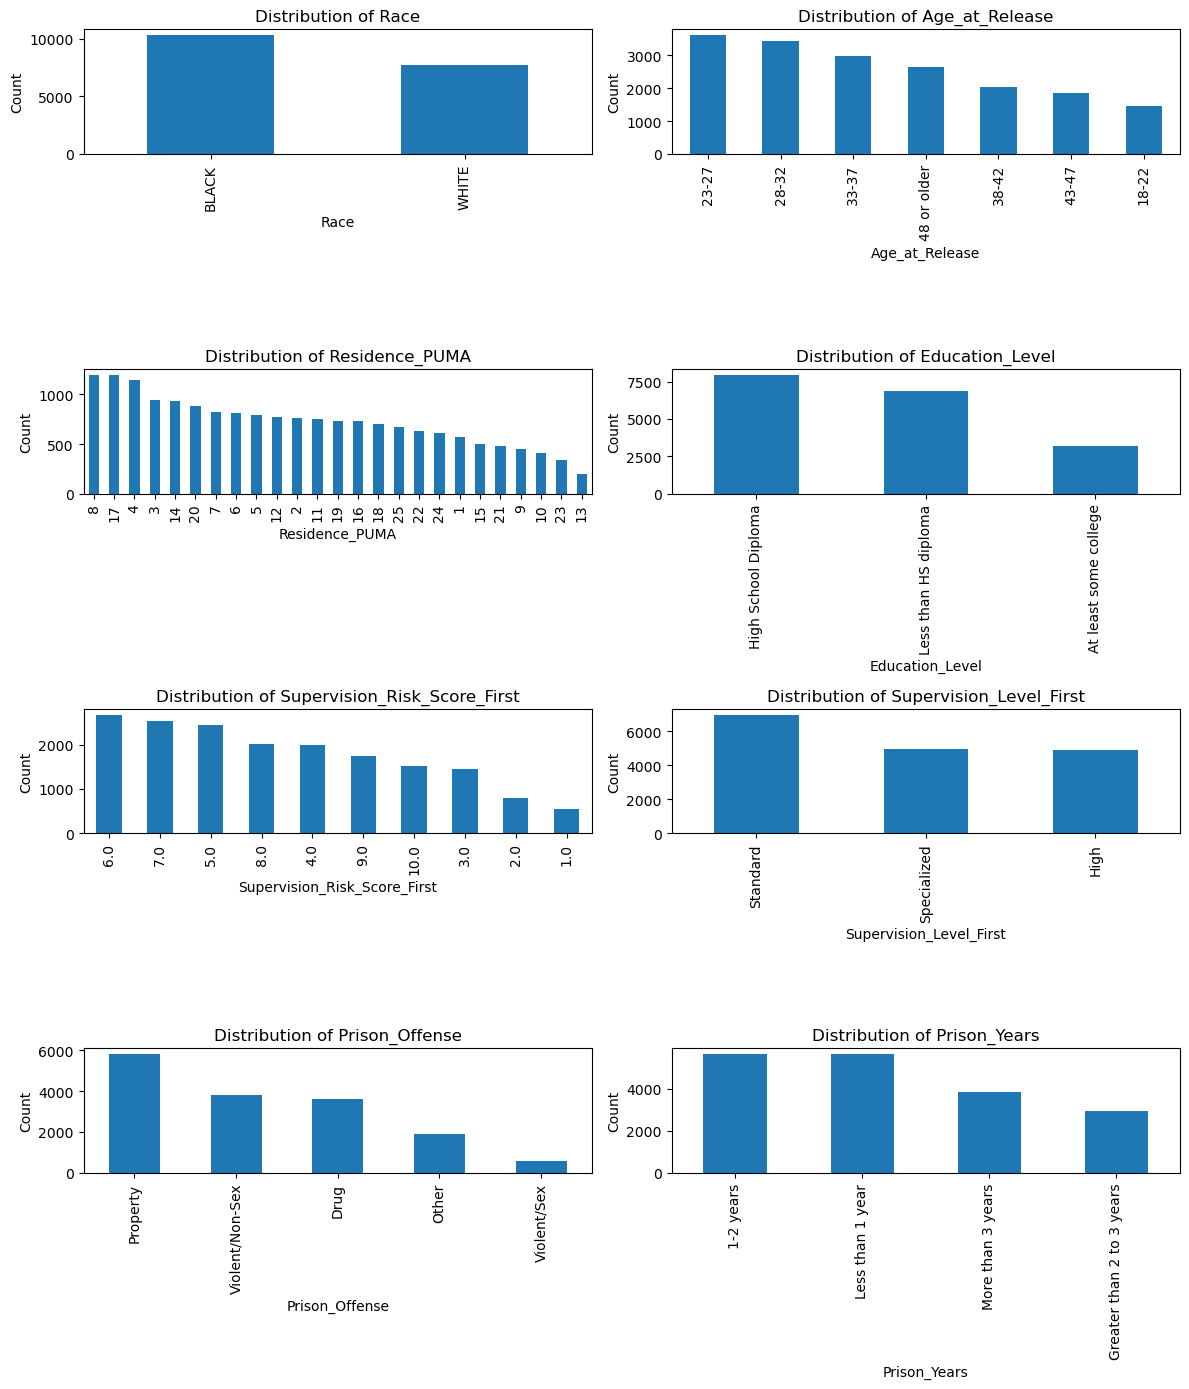

In [16]:
plt.figure(figsize=(12, 14))
columns_to_plot = ['Race', 'Age_at_Release', 'Residence_PUMA', 'Education_Level', 'Supervision_Risk_Score_First', 'Supervision_Level_First'
                   , 'Prison_Offense', 'Prison_Years']
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Part 2: Privacy



When collecting data for a study, privacy is almost always a primary concern. Our data set may include information that makes it possible to identify an individual, including:

- **Direct identifiers**, which are the ones that can be used to uniquely identify an individual or a household in a dataset, such as a record ID number, patient number, social insurance number, full address, etc. Usually, name is also considered a direct identifier (although several people can have the same name). Other features such as age, date of birth, or postal code are not sufficient on their own to uniquely identify an individual and would not be considered direct identifiers.
- **Indirect (or quasi) identifiers**, which are the columns that do not themselves identify any individual or household, but can do so when combined with other indirect-identifiers. For example, postal code and date of birth are often indirect identifiers, because it is very likely that within a zip code only one individual has this particular birth date. The more indirect identifiers that you have, the more likely it is that individuals become identifiable because there are more possible unique combinations of identifying features.

### Question 8
1. Which columns in the NIJ dataset are direct identifiers? Briefly motivate your answer.
2. Which of the remaining columns make good candidates for indirect identifiers? Which ones do not?

Hint: It can be useful to use the `nunique()` and `value_counts()` dataframe methods to get an idea of how many distinct values a feature has.


In [1]:
# Your answer here (code portion)

## De-identification of structured data

To safeguard the privacy of the individuals in our dataset, we need to make sure that they are not identifiable, either directly or indirectly. There are three main strategies to achieve this: suppression, pseudonymization, and generalization.

### Suppression
Suppression is an effective way to get rid of a direct identifier by simply removing the entire column. 

**Question 9:** using the appropriate dataframe methods, suppress all direct identifier in the NIJ training set. Save the result in a new dataframe called `suppressed_df`

In [2]:
# Your answer here

### Pseudonymization

A big issue with suppression of direct identifier is that it is not reversible. If at some point we need to identify an individual in our dataset, we would be out of luck. If you have reasons to believe that re-identification may be required, pseudonymization would be a better option to handle direct identifiers. Pseudonymization replaces one or more direct identifiers with a unique but less meaningful value. Usually when we pseudonymize an identifier, there is a possibility of re-identification if required (but it would not be available to the general public).

**Question 10:** pseudomyze the ID column of the NIJ training set and save the result in a new dataframe called `pseudo_df`. In a different code cell, show that it is possible to re-identify the samples by converting them back to the original ID number.

There are different ways to achieve this you may want to explore:
- Write your own pseudonymization function. You should write at least 2 functions: one to pseudomyze, and another to re-identify. The function does not have to be exceedingly complex but it should not be obvious either (e.g. only basic arithmetic involved).
- Use an extisting library, such as [`cryptography`](https://cryptography.io/en/latest/).

In [3]:
# Your answer here (you may add more cells as needed)

### Generalization

Generalization is a commonly used technique in anonymization, which involves reducing the precision of a column. For example, the date of birth or the date of a doctor's visit can be generalized to a month and year, to a year, or to a five-year interval. Generalization can help achieving $k$-anonymity. 

To check for $k$-anonymity, we will use the [`pycanon` library](https://github.com/IFCA/pycanon). You can install this library in your virtual environment by running the command:

```
pip install pycanon
```

**Question 11:** `pycanon` includes several functions (feel free to explore them in the related documentation), but we will only be using `k-anonimity`. Look at the documentation, then use `k-anonimity` to determine the $k$-anonymity of the following groups of variables:

- $k$-anonymity of Gender and Race features: ?
- $k$-anonymity of Gender, Race, and Age_at_Release features: ?
- $k$-anonymity of Gender, Race, Age_at_Release and Residence_PUMA features: ?

In [3]:
from pycanon import anonymity

# Your answer here

The $k$-anonymity of the combination of Gender, Race, Age_at_Release and Residence_PUMA is clearly problematic! It would be very easy to identify someone if we knew these 4 pieces of information about them. 

**Question 12:** can you bin the Residence_PUMA feature to achieve 4-anonymity for this set of features? Add the new column to the existing dataframe, using the name `Binned_PUMA`.

For this task, you may want to look into the `cut()` and `qcut()` functions of the pandas library.

Remember that now, when checking for $k$-anonymity, you should be looking at the new column `Binned_PUMA`, not at `Residence_PUMA`.

In [22]:
# Your answer here

With 4-anonymity for these set of features, we can rest assured that there are at least 4 individuals sharing the same combination, making it more difficult to identify someone by knowing only these 4 pieces of information. However, let's not ignore the following issues:
- We did not test $k$-anonymity for other combinations of features, so it is very likely that our dataset is still not anonymized.
- 4-anonymity is not very strong; if I can narrow down my search to 4 people, I can still learn a lot about a person (at least approximatively).
- We may lose $k$-anonymity by adding more information.

## Differential Privacy

As discussed in class, differential privacy is a stronger, mathematically robust definition of privacy for an algorithm. You can learn more about it by watching this video from Minute Physics: [Protecting Privacy with MATH](https://www.youtube.com/watch?v=pT19VwBAqKA)

After watching this video, try answering the following questions:
1. If you have two differentially private datasets, one with and one without your data, what does differential privacy guarantee regarding your privacy?
2. An algorithm has differential privacy $\epsilon$ = 2, another one $\epsilon$ = 4. Which one provides a higher level of privacy? Explain your answer.
3. The video highlights at least two of the main challenges with differential privacy. Summarize them.

## Randomized response

In class, we described randomized polling as a way to conduct interviews including sensitive questions, while protecting individuals' privacy. 

**Question 13:** imagine that UBC has been surveying students to understand how many of them have been cheating in a final exam. Because the information is very sensitive and students will most likely not want to share this information, they use the randomized polling protocol described in class. If 1000 students have been surveyed, and 300 of them responded "yes", what is the actual percentage of students who cheated in a final?

actually cheated: 300 - 1000*(1/4) = 50  

students that speak truthfully: 1000*(1/2) = 500 

actual percentage: 50/500 = 10%

# Part 3: Data Governance 

Data governance refers to the set of policies, procedures and standards that companies and organization must adopt to ensure quality, sacurity and usability of the data in their possession. 

To gain a better understanding of what data governance is, why it is important and what common mistakes affect it, please read the following articles:
- https://www.egnyte.com/guides/governance/data-ownership
- https://atlan.com/data-governance-mistakes/#what-is-data-governance

As you can see, the issue of data governance is complex and multifaceted. A group of experts with a variety of experties is necessary to design and implement a robust data governance plan. Still, we can train ourselves to spot the most common mistakes when we see them. Take, for example, the following fictitional scenario (co-authored in collaboration with [ChatGPT](https://chat.openai.com/))

"SleekTech Solutions" is a cutting-edge technology company specializes in technologies related to artificial intelligence and data analytics. Their services include data analytics, big data processing, cloud computing, and Internet of Things (IoT). They offer their services to various industries, such as healthcare, finance, retail, manufacturing.

The company is young, only founded in 2021, and has rapidly expanded. At their inception, they used to accumulate data in a vast digital repository known as the "Data Lake." Initially, this seemed like a cost-effective solution to store all types of data, and they have not changed this strategy to this date. 

To increase agility, SleekTech's different divisions have significant autonomy over their data. This means that the same data may be recorded by different department using different standards and metrics. SleekTech also encourages a culture of openness. Employees have access to vast amounts of data, including sensitive customer information, to complete the tasks they are assigned to.

SleekTech has been expanding rapidly. Founded in Canada, is now looking to expand into new markets including US and Europe.

**Question 14:** using the readings as reference, outline at least 4 distinct mistakes that SleekTech Solutions is likely to commit because of their data governance strategy. 


# Final thoughts

1) If you have completed this assignment in a group, please write a detailed description of how you divided the work and how you helped each other completing it:

2) Have you used ChatGPT or a similar Large Language Model (LLM) to complete this homework? Please describe how you used the tool. **We will never deduct points for using LLMs for completing homework assignments,** but this helps us understand how you are using the tool and advise you in case we believe you are using it incorrectly.

3) Have you struggled with some parts (or all) of this homework? Do you have pending questions you would like to ask? Write them down here!